<br>
# **1 Word Cloud**
**단어별 특징 구분/ 추출**하기

## **1 word cloud 만들기**


In [1]:
f         = open('./data/베를린선언.txt', 'r')
texts_org = f.read()
f.close()

texts = texts_org.split('\n\n')
texts[:5]

['존경하는 독일 국민 여러분,',
 '고국에 계신 국민 여러분,',
 '하울젠 쾨르버재단 이사님과 모드로 전 동독 총리님을 비롯한 내외 귀빈 여러분,',
 '\n먼저, 냉전과 분단을 넘어 통일을 이루고,',
 '그 힘으로 유럽통합과 국제평화를 선도하고 있는']

(-0.5, 399.5, 199.5, -0.5)

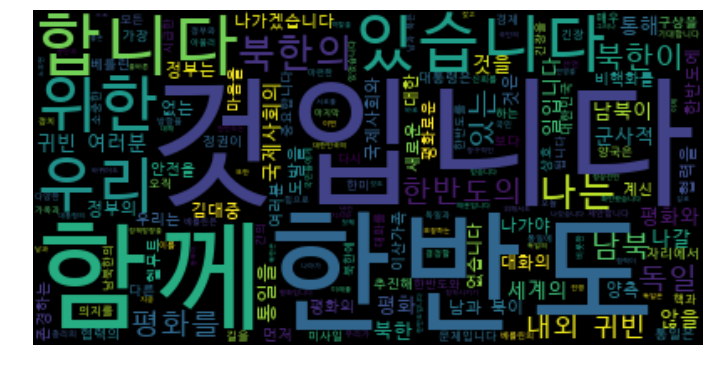

In [2]:
%matplotlib inline
from matplotlib import rc
import matplotlib.pyplot as plt
rc('font', family='NanumGothic')

from wordcloud import WordCloud
wcloud = WordCloud('./data/D2Coding.ttf',relative_scaling = 0.2).generate(texts_org)
plt.figure(figsize=(12,12))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")

<br>
# **2 Token**

<br>
## **1 Token**
어휘분석


In [3]:
# 문장부호를 기준으로 문장을 나눈다
text = "자정이 조금 넘은 시각 낯선 남성이 아파트 엘리베이터까지 따라왔다. 층수를 누르는데. 남성은 미동이 없었다. 문이 열리고 집을 향해 걸었다."

from nltk import sent_tokenize
sent_tokenize(text)

['자정이 조금 넘은 시각 낯선 남성이 아파트 엘리베이터까지 따라왔다.',
 '층수를 누르는데.',
 '남성은 미동이 없었다.',
 '문이 열리고 집을 향해 걸었다.']

In [4]:
from nltk import word_tokenize

text = "I want to Drink a beer"
text = word_tokenize(text)
text

['I', 'want', 'to', 'Drink', 'a', 'beer']

<br>
## **2 Token 의 빈도분석**

In [5]:
from nltk import FreqDist
dict(FreqDist(text))

{'I': 1, 'want': 1, 'to': 1, 'Drink': 1, 'a': 1, 'beer': 1}

In [6]:
texts_token = word_tokenize(texts_org)
texts_token_dict = dict(FreqDist(texts_token))

In [7]:
import pandas as pd
texts_token_series = pd.Series(texts_token_dict)
texts_token_series.sort_values(ascending=False)

.         168
,          67
것입니다       28
한반도        20
함께         18
있습니다       16
합니다        16
수          15
위한         13
북한의        12
우리         12
나는         11
북한이        11
한반도의       11
이          11
여러분        10
남과         10
독일         10
평화를        10
있는          9
‘           8
남북          8
’           8
더           7
내외          7
귀빈          7
그           6
평화와         6
국제사회의       6
세계의         6
         ... 
상황과         1
정치‧군사적      1
비정치적        1
다섯째         1
경제모델을       1
그때          1
하면          1
실천하기만       1
정상선언을       1
공동번영할       1
교량국가로       1
해양을         1
대륙과         1
추진될         1
철도는         1
협력사업들도      1
연결          1
가스관         1
남·북·러       1
달릴          1
유럽으로        1
러시아와        1
북경으로        1
평양과         1
열차가         1
출발한         1
목포에서        1
부산과         1
이어질         1
유효합니다       1
Length: 1186, dtype: int64

<br>
## **3 Regex 정규식**

In [8]:
text = "park 010-1234-1234"

import re
re.findall(r'\d+', text)

['010', '1234', '1234']

In [9]:
re.findall(r'[A-z]\w+', text)

['park']

In [10]:
text = "질문이 있으시면 저의 Web Site의 항목을 참고해 주세요"

from nltk.tokenize import RegexpTokenizer
re_capt = RegexpTokenizer('[A-Z]\w+')
re_capt.tokenize(text)

['Web', 'Site의']

In [11]:
from nltk.tokenize import RegexpTokenizer
re_capt = RegexpTokenizer('[가-힣]\w+')
re_capt.tokenize(text)

['질문이', '있으시면', '저의', '항목을', '참고해', '주세요']

<br>
# **3 Stemming**

<br>
## **1 NLTK 기본포함 모듈의 활용**
1. TreebankWordTokenizer
1. WordPunctTokenizer (정규식 활용)

In [12]:
%time
text = " Don't hesitate to ask questions"

# Penn Treebank Corpus 에 따른 기준을 사용하여, 문법별로 나눈다
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
text = tokenizer.tokenize(text)
text

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


['Do', "n't", 'hesitate', 'to', 'ask', 'questions']

In [13]:
from nltk import pos_tag
pos_tag(text)

[('Do', 'VBP'),
 ("n't", 'RB'),
 ('hesitate', 'VB'),
 ('to', 'TO'),
 ('ask', 'VB'),
 ('questions', 'NNS')]

In [14]:
%time
text = " Don't hesitate to ask questions"

from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()
text = tokenizer.tokenize(text)
text

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


['Don', "'", 't', 'hesitate', 'to', 'ask', 'questions']

In [15]:
from nltk import pos_tag
pos_tag(text)

[('Don', 'NNP'),
 ("'", 'POS'),
 ('t', 'NN'),
 ('hesitate', 'NN'),
 ('to', 'TO'),
 ('ask', 'VB'),
 ('questions', 'NNS')]

In [16]:
# Token을 어떻게 생성하느냐에 따라 Tag 결과값이 다르게 출력된다.
# sentence 의 Text를 전처리 
# 전처리한 내용을 대상으로 Token을 생성한다
# 생성된 Token을 대상으로 품사를 정의한다

<br>
## **2 한글과 영문이 섞인경우**
use by Default Setting

In [17]:
text = "이 무더위 속에서 맥주한잔 마시고 싶습니다"
text = word_tokenize(text)
pos_tag(text)

[('이', 'JJ'),
 ('무더위', 'NNP'),
 ('속에서', 'NNP'),
 ('맥주한잔', 'NNP'),
 ('마시고', 'NNP'),
 ('싶습니다', 'NN')]

In [18]:
text = "질문이 있으시면 저희들의 Web Site를 통해서 거침없이 Question 해주세요"

from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
text = tokenizer.tokenize(text)
text

['질문이', '있으시면', '저희들의', 'Web', 'Site를', '통해서', '거침없이', 'Question', '해주세요']

In [19]:
from nltk import pos_tag
pos_tag(text)

[('질문이', 'JJ'),
 ('있으시면', 'NNP'),
 ('저희들의', 'NNP'),
 ('Web', 'NNP'),
 ('Site를', 'NNP'),
 ('통해서', 'NNP'),
 ('거침없이', 'NNP'),
 ('Question', 'NNP'),
 ('해주세요', 'NN')]

<br>
## **3 Tag 설명**

In [20]:
import nltk.help as nltk_help
nltk_help.upenn_tagset('PRP')  # 대명사

PRP: pronoun, personal
    hers herself him himself hisself it itself me myself one oneself ours
    ourselves ownself self she thee theirs them themselves they thou thy us


In [21]:
nltk_help.upenn_tagset('JJ')  # 형용사

JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...


<br>
# **4 pip3 install konlpy **
<br>
## **1 한글 에서의 Token 와 Tag 생성**

In [22]:
from konlpy.tag import Twitter
twitter = Twitter()
text = '단독입찰보다 복수입찰의 경우'
twitter.pos(text)

[('단독', 'Noun'),
 ('입찰', 'Noun'),
 ('보다', 'Josa'),
 ('복수', 'Noun'),
 ('입찰', 'Noun'),
 ('의', 'Josa'),
 ('경우', 'Noun')]

In [23]:
%%time
text = '민병삼 대령의 항명행위로 초치했다'
print(twitter.pos(text))

[('민병삼', 'Noun'), ('대령', 'Noun'), ('의', 'Josa'), ('항', 'Noun'), ('명', 'Suffix'), ('행위', 'Noun'), ('로', 'Josa'), ('초치', 'Noun'), ('했', 'Verb'), ('다', 'Eomi')]
CPU times: user 11.8 ms, sys: 3.98 ms, total: 15.8 ms
Wall time: 11.1 ms


In [24]:
%%time
text = '민병삼 대령의 항명행위로 초치했다'
print(twitter.pos(text, stem=True))

[('민병삼', 'Noun'), ('대령', 'Noun'), ('의', 'Josa'), ('항', 'Noun'), ('명', 'Suffix'), ('행위', 'Noun'), ('로', 'Josa'), ('초치', 'Noun'), ('하다', 'Verb')]
CPU times: user 616 ms, sys: 11.6 ms, total: 628 ms
Wall time: 226 ms


In [25]:
%%time
    
# 신조어 또는 사용자가 원하는 임의 태그를 사용하고 싶은경우
text = '민병삼 대령의 항명행위로 초치했다'
print(twitter.pos(text, stem=True))

[('민병삼', 'Noun'), ('대령', 'Noun'), ('의', 'Josa'), ('항', 'Noun'), ('명', 'Suffix'), ('행위', 'Noun'), ('로', 'Josa'), ('초치', 'Noun'), ('하다', 'Verb')]
CPU times: user 14.9 ms, sys: 0 ns, total: 14.9 ms
Wall time: 8.79 ms


In [26]:
%%time
text = '민병삼 대령의 항명행위로 초치했다'

from konlpy.tag import Kkma
kkma = Kkma()
print(kkma.pos(text))

[('민병', 'NNG'), ('삼', 'NNG'), ('대령', 'NNG'), ('의', 'JKG'), ('항명', 'NNG'), ('행위', 'NNG'), ('로', 'JKM'), ('초치', 'NNG'), ('하', 'XSV'), ('었', 'EPT'), ('다', 'EFN')]
CPU times: user 19.1 s, sys: 233 ms, total: 19.3 s
Wall time: 6.59 s


In [27]:
%%time
text = '민병삼 대령의 항명행위로 초치했다'

from konlpy.tag import Hannanum
han = Hannanum()
print(han.pos(text))

[('민병삼', 'N'), ('대령', 'N'), ('의', 'J'), ('항명행위', 'N'), ('로', 'J'), ('초치했다', 'N')]
CPU times: user 8.37 s, sys: 64.8 ms, total: 8.43 s
Wall time: 2.37 s


<br>
## **2 한글 WordCloud 만들기**

In [28]:
# 독일 퀘르버 재단 연설문 : 베를린 선언
f     = open('./data/베를린선언.txt', 'r')
texts_org = f.read()
f.close()

In [29]:
texts_nouns = twitter.nouns(texts_org)
texts_nouns[:10]

['독일', '국민', '여러분', '고국', '국민', '여러분', '하울', '젠', '쾨르버', '재단']

In [30]:
result_nouns = ''
for txt in texts_nouns:
    result_nouns += " " + txt

result_nouns[:500]

' 독일 국민 여러분 고국 국민 여러분 하울 젠 쾨르버 재단 이사 모드 전 동독 총리 내외 귀빈 여러분 먼저 냉전 분단 통일 그 힘 유럽 통합 국제 평화 선도 독일 독일 국민 무한 경의 표 오늘 이 자리 주신 독일 정부 쾨르버 재단 감사 얼마 전 별세 헬 무트 콜 총리 가족 독일 국민 은 애도 위로 마음 대한민국 냉전 시기 환경 속 적극 능동 외교 독일 통일 유럽 통합 주도 헬 무트 콜 총리 업적 것 친 애하 내외 귀빈 여러분 곳 베를린 지금 년 전 한국 김대중 대통령 남북 화해 협력 기틀 베를린 선언 곳 여기 알테스 슈 타트 하우스 독일 통일 조약 협상 역사 현장 나 오늘 베를린 교훈 이 자리 대한민국 새 정부 한반도 평화 구상 내외 귀빈 여러분 독일 통일 경험 지구 마지막 분단국가 우리 통일 대한 희망 우리 방향 그것 우선 통일 과정 중요성 독일 통일 상호 존중 바탕 평화 협력 과정 얼마나 일 독일 국민 이 과정 축적 신뢰 바탕 스스로 통일 결정 수 동서 독 시민 분야 교류 협력 '

(-0.5, 399.5, 199.5, -0.5)

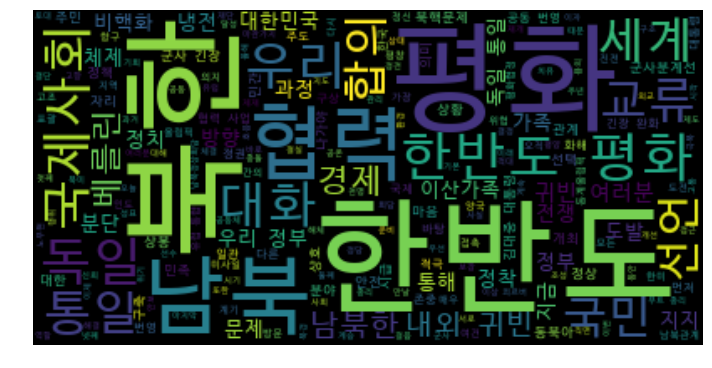

In [31]:
%matplotlib inline
from matplotlib import rc
import matplotlib.pyplot as plt
rc('font', family='NanumGothic')

from wordcloud import WordCloud
wcloud = WordCloud('./data/D2Coding.ttf',relative_scaling = 0.2).generate(result_nouns)
plt.figure(figsize=(12,12))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")